In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset_with_class.csv')

In [2]:
# df.columns
TARGET_CLASS = 'Burnout_E'

# Burnout por idade

In [3]:
# Executar isso apenas uma vez:

if 'IdadeCat' in df.columns: # and 'NrProfCat' in df_features_pre_processed.columns:
    # df_features_pre_processed = df_features_pre_processed.drop(columns=['IdadeCat', 'NrProfCat'])
    df = df.drop(columns=['IdadeCat'])
else:
    aaa = pd.cut(df.Idade, [0, 24, 34, 44, 54, 64, 100], labels=["até 24", "24 a 34", "34 a 44", "44 a 54", "54 a 64", "Mais que 64"])
    df.insert(len(df.columns), "IdadeCat", aaa)
    # bbb = pd.cut(df_features_pre_processed.Numero_professores, [0, 36, 72, 108, 144, 200], labels=["até 36", "36 a 72", "72 a 108", "108 a 144", "Mais que 144"])
    # df_features_pre_processed.insert(len(df_features_pre_processed.columns), "NrProfCat", bbb)
    dfg = df[df[TARGET_CLASS]==1][["IdadeCat", TARGET_CLASS]].groupby(by=["IdadeCat"]).count()
    dfg2 = df[df[TARGET_CLASS]==0][["IdadeCat", TARGET_CLASS]].groupby(by=["IdadeCat"]).count()
    
# plt.figure(figsize=(12,7))

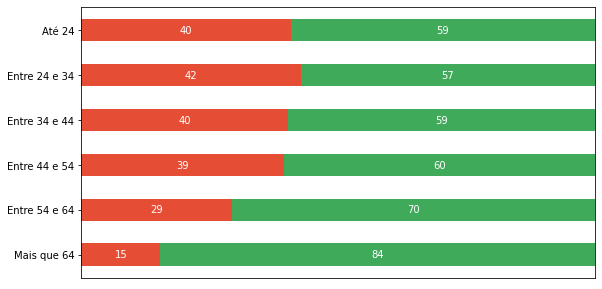

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calc_cats(x, dfg, dfg2):
        
    return [dfg.values[x][0] / (dfg.values[x][0] + dfg2.values[x][0]) * 100, dfg2.values[x][0] / (dfg.values[x][0] + dfg2.values[x][0]) * 100]

category_names = ['Burnout', 'Standard']
results = {
    'Até 24': calc_cats(0, dfg, dfg2),
    'Entre 24 e 34': calc_cats(1, dfg, dfg2),
    'Entre 34 e 44': calc_cats(2, dfg, dfg2),
    'Entre 44 e 54': calc_cats(3, dfg, dfg2),
    'Entre 54 e 64': calc_cats(4, dfg, dfg2),
    'Mais que 64': calc_cats(5, dfg, dfg2)
}


def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    # ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
    #           loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
# plt.title('Proporção de pessoas Com Burnout e Sem Burnout por idade', pad=40)
# plt.savefig('fig10_burnout_health.tiff', dpi=300)
plt.show()

In [5]:
# survey(results, category_names)
# plt.title('Proporção de pessoas Com Burnout e Sem Burnout por idade', pad=40)

# Burnout por Saude

In [6]:
# df['TAMesc'].plot.box()
# df[df['TAMesc'] < 20]['TAMesc'].describe()
# dfg2
# [0, 1.79, 2.73, 3.91, 5, 9.38]


In [7]:
COLUMN = 'SaudeCat'

# print(df.Saude.describe())

# labels = [a for a in [0.5, 3, 3.75, 4, 4.5, 5]]
labels = [a for a in np.arange(0.5, 5, 0.5)]

if COLUMN in df.columns: # and 'NrProfCat' in df_features_pre_processed.columns:
    # df_features_pre_processed = df_features_pre_processed.drop(columns=['IdadeCat', 'NrProfCat'])
    df = df.drop(columns=[COLUMN])

aaa = pd.cut(df.Saude, labels) #,  labels=["Very Large", "Large", "Small", "Very Small"])
df.insert(len(df.columns), COLUMN, aaa)

dfg = df[df[TARGET_CLASS]==1][[COLUMN, TARGET_CLASS]].groupby(by=[COLUMN]).count()
dfg2 = df[df[TARGET_CLASS]==0][[COLUMN, TARGET_CLASS]].groupby(by=[COLUMN]).count()

results = dict()

for idx in range(len(labels)-1):
    results[str(labels[idx])] = calc_cats(idx, dfg, dfg2)
    
results

{'0.5': [72.0, 28.000000000000004],
 '1.0': [71.05263157894737, 28.947368421052634],
 '1.5': [65.21739130434783, 34.78260869565217],
 '2.0': [65.80882352941177, 34.19117647058824],
 '2.5': [54.01574803149606, 45.98425196850393],
 '3.0': [45.27131782945737, 54.72868217054263],
 '3.5': [31.244635193133046, 68.75536480686695],
 '4.0': [29.550321199143468, 70.44967880085653]}

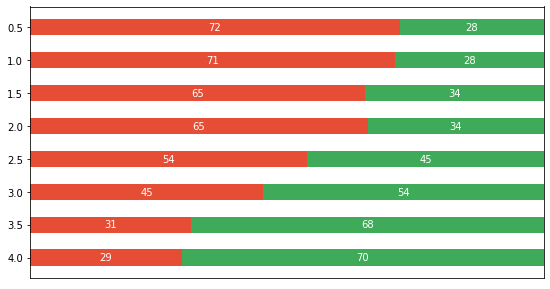

In [8]:
# plt.figure(figsize=(12,7))

survey(results, category_names)
# plt.title('Burnout by Health', pad=20)
# plt.ylabel('asd')
plt.savefig('fig9_burnout_health.tiff', dpi=300, format="tiff", pil_kwargs={"compression": "tiff_lzw"})
plt.show()

# Burnout por SCV

In [9]:
COLUMN = 'SCVCat'

print(df.SCV.describe())

# labels = [a for a in [0.5, 3, 3.75, 4, 4.5, 5]]
labels = [a for a in np.arange(1.1, 7.2, 0.5)]

print(labels)

if COLUMN in df.columns: # and 'NrProfCat' in df_features_pre_processed.columns:
    # df_features_pre_processed = df_features_pre_processed.drop(columns=['IdadeCat', 'NrProfCat'])
    df = df.drop(columns=[COLUMN])

aaa = pd.cut(df.SCV, labels) #,  labels=["Very Large", "Large", "Small", "Very Small"])
df.insert(len(df.columns), COLUMN, aaa)

dfg = df[df[TARGET_CLASS]==1][[COLUMN, TARGET_CLASS]].groupby(by=[COLUMN]).count()
dfg2 = df[df[TARGET_CLASS]==0][[COLUMN, TARGET_CLASS]].groupby(by=[COLUMN]).count()

results = dict()

for idx in range(len(labels)-1):
    # results[str(idx)] = calc_cats(idx, dfg, dfg2)
    results[str(labels[idx])] = calc_cats(idx, dfg, dfg2)
results

count    3970.000000
mean        5.242363
std         1.224491
min         0.000000
25%         4.600000
50%         5.400000
75%         6.000000
max        20.000000
Name: SCV, dtype: float64
[1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1, 6.6, 7.1]


{'1.1': [95.0, 5.0],
 '1.6': [67.74193548387096, 32.25806451612903],
 '2.1': [58.9041095890411, 41.0958904109589],
 '2.6': [62.96296296296296, 37.03703703703704],
 '3.1': [59.5, 40.5],
 '3.6': [60.38647342995169, 39.61352657004831],
 '4.1': [52.25225225225225, 47.74774774774775],
 '4.6': [45.766590389016024, 54.23340961098398],
 '5.1': [39.72431077694235, 60.27568922305765],
 '5.6': [31.10831234256927, 68.89168765743074],
 '6.1': [25.08833922261484, 74.91166077738515],
 '6.6': [13.261648745519713, 86.73835125448028]}

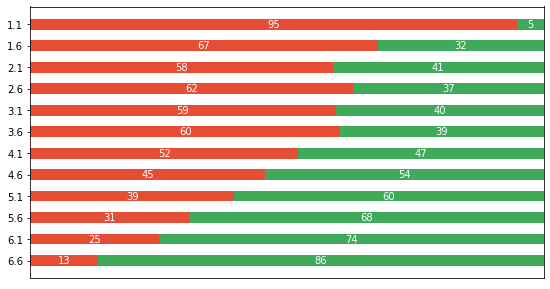

In [10]:
survey(results, category_names)
# plt.title('Burnout by SCV', pad=20)
# plt.gcf().subplots_adjust(top=0.35)
plt.savefig('fig11_burnout_scv.tiff', dpi=300, format="tiff", pil_kwargs={"compression": "tiff_lzw"})
plt.show()

# Burnout por Tempo Profissão

In [11]:
labels = ["< 7", "7 to 14", "14 to 21", "21 to 28", "28 to 35", "> 35", "> 42"]

if 'TempoProfCat' in df.columns: # and 'NrProfCat' in df_features_pre_processed.columns:
    # df_features_pre_processed = df_features_pre_processed.drop(columns=['IdadeCat', 'NrProfCat'])
    df = df.drop(columns=['TempoProfCat'])

aaa = pd.cut(df['Tempo_profissão'], list(range(0, 55, 7)), labels=labels)
df.insert(len(df.columns), "TempoProfCat", aaa)

dfg = df[df[TARGET_CLASS]==1][["TempoProfCat", TARGET_CLASS]].groupby(by=["TempoProfCat"]).count()
dfg2 = df[df[TARGET_CLASS]==0][["TempoProfCat", TARGET_CLASS]].groupby(by=["TempoProfCat"]).count()

results = dict()

for idx in range(len(labels)-1):
    results[labels[idx]] = calc_cats(idx, dfg, dfg2)

In [12]:
results

{'< 7': [40.421052631578945, 59.578947368421055],
 '7 to 14': [39.92740471869328, 60.07259528130672],
 '14 to 21': [42.94736842105264, 57.05263157894736],
 '21 to 28': [40.33898305084746, 59.66101694915255],
 '28 to 35': [29.260450160771708, 70.7395498392283],
 '> 35': [28.30188679245283, 71.69811320754717]}

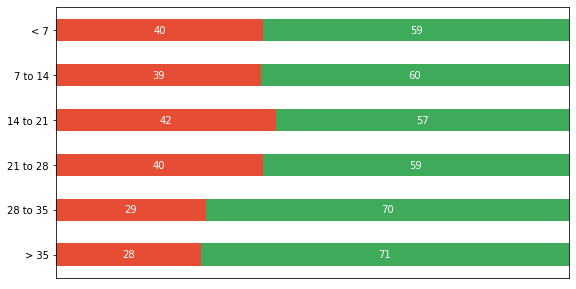

In [13]:
# df['Tempo_profissão'].describe()
# dfg2
survey(results, category_names)
# plt.title('Proportion of people with and without Burnout (standard), discretized by the time in the profession (years) ', pad=30)
plt.savefig('fig12_burnout_profession.tiff', dpi=300, format="tiff", pil_kwargs={"compression": "tiff_lzw"})
plt.show()

# Qual o perfil de risco do profissional com Burnout?

In [14]:
"""
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

# number of variable
categories=list(df)[1:]
N = len(categories)
print(categories, N)

values=df.loc[0].drop('group').values.flatten().tolist()
print(values)
values += values[:1]
print(values)
"""
df.columns

Index(['Idade', 'Formação', 'Tempo_Escola', 'Tempo_profissão', 'Hrs_semanais',
       'Supervisiona', 'Licença_2semanas', 'Licença_ano', 'MPS', 'IPPS',
       'IOPS', 'ISP', 'CAFC', 'VSP', 'ARE', 'DED', 'ARS', 'AED', 'Engagement',
       'Exaustao', 'Cinismo', 'SCV', 'Saude', 'TAMesc', 'Burnout_E',
       'IdadeCat', 'SaudeCat', 'SCVCat', 'TempoProfCat'],
      dtype='object')

In [15]:
df

# use_cols = ['Idade', 'SCV', 'Cinismo', 'Saude', 'TAMesc', 'Exaustao']
use_cols = ['SCV', 'Saude', 'Tempo_Escola', 'Burnout_E', 'Tempo_profissão', 'TAMesc']
df_radar = df[use_cols]
# df_radar['Idade'] = df.loc[:, 'Idade'] / 10
# df_radar['Tempo_profissão'] = df_radar['Tempo_profissão'] / 10

df_radar = df_radar.groupby('Burnout_E').mean() # avoid outliers WIRTE THIS!!!
df_radar.reset_index().drop(columns=['Burnout_E'])

,SCV,Saude,Tempo_Escola,Tempo_profissão,TAMesc
0,5.498758,3.860935,7.316985,15.297265,3.135353
1,4.854525,3.324927,7.424119,14.676519,3.254272


In [16]:
# Padronização
from sklearn.preprocessing import normalize
# from sklearn.preprocessing import scale

df_norm = pd.DataFrame(normalize(df[use_cols], copy=True))
# df_norm = pd.DataFrame(scale(df[use_cols], axis=0, with_mean=True, with_std=True, copy=True))

In [19]:
# Normalization + KMeans

from sklearn.cluster import KMeans
import numpy as np

# kmeans = KMeans(n_clusters=2, random_state=0).fit(df[use_cols])
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_norm)
df_radar = pd.DataFrame(kmeans.cluster_centers_)
df_radar = df_radar.drop(columns=[4]).rename(columns={0: 'SWL', 1: 'Health', 2: 'School Time', 3: 'Profession Time', 5: 'Engagement', 6: 'School Size'})
df_radar = df_radar.apply(lambda x : x * 10)

# df_radar['Age'] = df_radar['Age'].apply(lambda x: x/10)
# df_radar2 = df_radar.drop(columns=['Age']).apply(lambda x : x*3)
# df_radar2['Age'] = df_radar['Age'] / 2
# df_radar = df_radar2

df_radar

,SWL,Health,School Time,Profession Time,Engagement
0,5.307757,3.803094,2.568917,0.375612,3.31221
1,2.462264,1.699561,3.794661,0.211694,1.41249


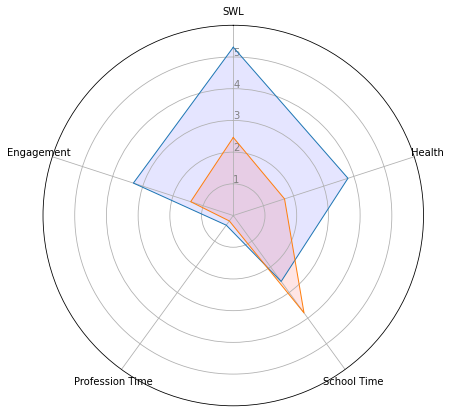

In [20]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
"""
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
"""
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_radar)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(12,7))

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4,5], ["1","2","3","4","5"], color="grey", size=10)
plt.ylim(0,6)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_radar.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Normal")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_radar.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Burnout")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
# plt.figure(figsize=(12,7))
plt.savefig('fig7_radar.tiff', dpi=300, format="tiff", pil_kwargs={"compression": "tiff_lzw"})
plt.show()